---

_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 2

In this assignment you'll explore the relationship between model complexity and generalization performance, by adjusting key parameters of various supervised learning models. Part 1 of this assignment will look at regression and Part 2 will look at classification.

## Part 1 - Regression

First, run the following block to set up the variables needed for later sections.

<IPython.core.display.Javascript object>


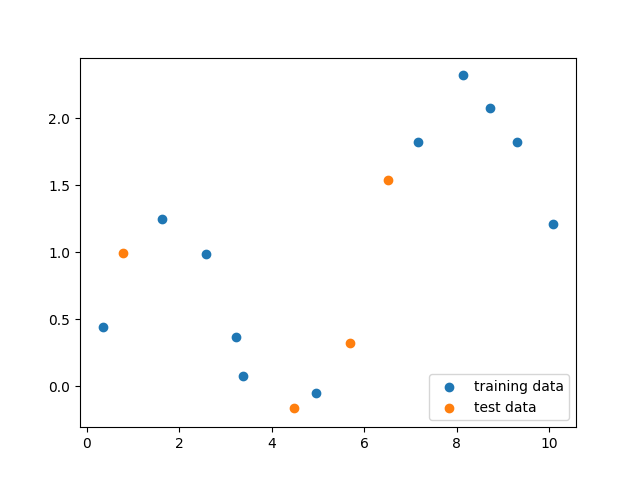

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

# You can use this function to help you visualize the dataset by
# plotting a scatterplot of the data points
# in the training and test sets.
def part1_scatter():
    %matplotlib notebook
    plt.figure()
    plt.scatter(X_train, y_train, label='training data')
    plt.scatter(X_test, y_test, label='test data')
    plt.legend(loc=4);
    
    
# NOTE: Uncomment the function below to visualize the data, but be sure 
# to **re-comment it before submitting this assignment to the autograder**.   
part1_scatter()

### Question 1

Write a function that fits a polynomial LinearRegression model on the *training data* `X_train` for degrees 1, 3, 6, and 9. (Use PolynomialFeatures in sklearn.preprocessing to create the polynomial features and then fit a linear regression model) For each model, find 100 predicted values over the interval x = 0 to 10 (e.g. `np.linspace(0,10,100)`) and store this in a numpy array. The first row of this array should correspond to the output from the model trained on degree 1, the second row degree 3, the third row degree 6, and the fourth row degree 9.

<img src="readonly/polynomialreg1.png" style="width: 1000px;"/>

The figure above shows the fitted models plotted on top of the original data (using `plot_one()`).

<br>
*This function should return a numpy array with shape `(4, 100)`*

In [2]:
def answer_one():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    import numpy as np
    
    """
    degree-1: X_train_poly shape: 11 x 2, test_x_poly shape: 100 x 2, features:1, x0,
    degree-3: X_train_poly shape: 11 x 4, test_x_poly shape: 100 x 4, features:1, x0, x0^2, x0^3
    degree-6: X_train_poly shape: 11 x 7, test_x_poly shape: 100 x 7, features:1, x0, x0^2, x0^3, x0^4, x0^5, x0^6
    degree-9: X_train_poly shape: 11 x 10, test_x_poly shape: 100 x 10, features:1, x0, x0^2, x0^3, x0^4, x0^5, x0^6, x0^7, x0^8, x0^9
    """

    # Your code here
    res = np.zeros((4,100),dtype=np.float)

    for m in [1,3,6,9]:

        # 1. create polynomial features object for that degree, lets call it poly
        poly = PolynomialFeatures(degree=m)

        # 2. reshape X_train and convert it to polynomial features using poly, let us call the result X_train_poly
        global X_train
        X_train = X_train.reshape(-1,1)
        poly = PolynomialFeatures(degree=m)
        X_train_poly = poly.fit_transform(X_train)
        # print(X_train_poly.shape)
        # (11, 2)
        # (11, 4)
        # (11, 7)
        # (11, 10)

        # 3. define and fit a LinearRegression model lr using X_train_poly and y_train
        linreg2 = LinearRegression().fit(X_train_poly, y_train)
        # print(linreg2) # LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

        # 4. create test_x = np.linspace(0,10,100).reshape(-1,1), transform test_x to polynomial features using poly.tranform. 
        # Let's call the result test_x_poly
        test_x = np.linspace(0,10,100).reshape(-1,1)
        test_x_poly = poly.transform(test_x)
        # print(test_x_poly.shape)
        # (100, 2)
        # (100, 4)
        # (100, 7)
        # (100, 10)

        # 5. apply lr predict to test_x_poly, let's call the result y_predict.
        y_predict = linreg2.predict(test_x_poly)
        # print(y_predict.shape)  (100,)

        # 6. make sure y_predict is a 1 dimensional array, of shape (100,) you can do so using y_predict.flatten() 
        # and store in res using  res[i,:] =  y_predict.flatten()
        if m == 1:
            res[0,:] = y_predict.flatten()
        if m == 3:
            res[1,:] = y_predict.flatten()
        if m == 6:
            res[2,:] = y_predict.flatten()
        if m == 9:
            res[3,:] = y_predict.flatten()

    
    # Return your answer
    return res

answer_one()



array([[  2.53040195e-01,   2.69201547e-01,   2.85362899e-01,
          3.01524251e-01,   3.17685603e-01,   3.33846955e-01,
          3.50008306e-01,   3.66169658e-01,   3.82331010e-01,
          3.98492362e-01,   4.14653714e-01,   4.30815066e-01,
          4.46976417e-01,   4.63137769e-01,   4.79299121e-01,
          4.95460473e-01,   5.11621825e-01,   5.27783177e-01,
          5.43944529e-01,   5.60105880e-01,   5.76267232e-01,
          5.92428584e-01,   6.08589936e-01,   6.24751288e-01,
          6.40912640e-01,   6.57073992e-01,   6.73235343e-01,
          6.89396695e-01,   7.05558047e-01,   7.21719399e-01,
          7.37880751e-01,   7.54042103e-01,   7.70203454e-01,
          7.86364806e-01,   8.02526158e-01,   8.18687510e-01,
          8.34848862e-01,   8.51010214e-01,   8.67171566e-01,
          8.83332917e-01,   8.99494269e-01,   9.15655621e-01,
          9.31816973e-01,   9.47978325e-01,   9.64139677e-01,
          9.80301028e-01,   9.96462380e-01,   1.01262373e+00,
        

<IPython.core.display.Javascript object>


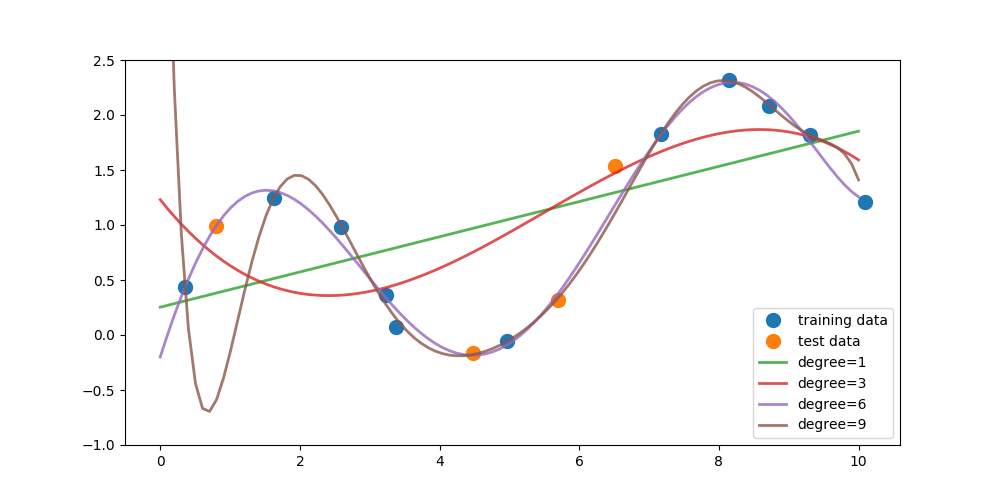

In [3]:
# feel free to use the function plot_one() to replicate the figure 
# from the prompt once you have completed question one

def plot_one(degree_predictions):
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([1,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)

plot_one(answer_one())


### Question 2

Write a function that fits a polynomial LinearRegression model on the training data `X_train` for degrees 0 through 9. For each model compute the $R^2$ (coefficient of determination) regression score on the training data as well as the the test data, and return both of these arrays in a tuple.

*This function should return one tuple of numpy arrays `(r2_train, r2_test)`. Both arrays should have shape `(10,)`*

In [4]:
def answer_two():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.metrics.regression import r2_score
    import numpy as np
    # sklearn.metrics.r2_score(y_true, y_pred, sample_weight=None, multioutput=None)
    
    # initialize empty lists
    r2_train = []
    r2_test = []
    
    # Your code here
    for m in range(0,10):
        global X_train
        global X_test
        # transform the test data, X_test... don't forget to reshape it before processing! You don't need to fit it 
        # to the model because it has been trained already with the training data X_train (common pitfall) therefore, 
        # just use transform.
        X_train = X_train.reshape(-1,1)
        X_test = X_test.reshape(-1,1)
        
        poly = PolynomialFeatures(degree=m)
        X_train_poly = poly.fit_transform(X_train)  
        
        X_test_poly = poly.transform(X_test)

        linreg3 = LinearRegression().fit(X_train_poly, y_train)
        
        #res1 = r2_score(y_train, y_predict_train)
        res1 = linreg3.score(X_train_poly, y_train) # same as above code
        r2_train.append(res1)

        #res2 = r2_score(y_test, y_predict_test) 
        res2 = linreg3.score(X_test_poly, y_test) # same as above code
        r2_test.append(res2)
    
    # list to array
    res3 = np.array(r2_train)
    res4 = np.array(r2_test)
    # res3.shape,res4.shape   ((10,), (10,))
    
    # Your answer here
    return res3,res4

answer_two()

(array([ 0.        ,  0.42924578,  0.4510998 ,  0.58719954,  0.91941945,
         0.97578641,  0.99018233,  0.99352509,  0.99637545,  0.99803706]),
 array([-0.47808642, -0.45237104, -0.06856984,  0.00533105,  0.73004943,
         0.87708301,  0.9214094 ,  0.92021504,  0.63247944, -0.64525447]))

### Question 3

Based on the $R^2$ scores from question 2 (degree levels 0 through 9), what degree level corresponds to a model that is underfitting? What degree level corresponds to a model that is overfitting? What choice of degree level would provide a model with good generalization performance on this dataset? Note: there may be multiple correct solutions to this question.

(Hint: Try plotting the $R^2$ scores from question 2 to visualize the relationship between degree level and $R^2$)

*This function should return one tuple with the degree values in this order: `(Underfitting, Overfitting, Good_Generalization)`*

<IPython.core.display.Javascript object>


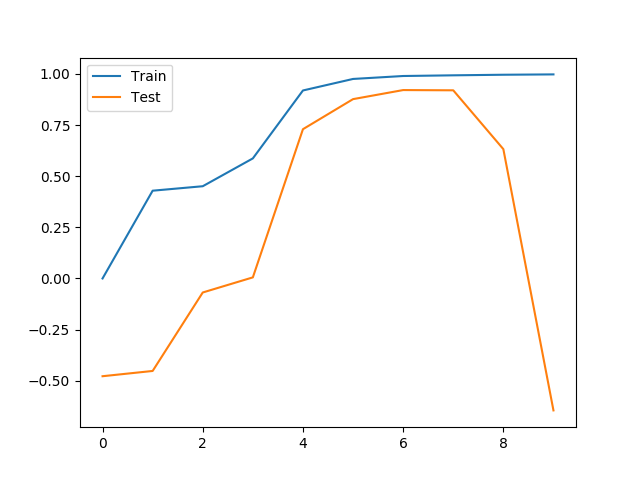

(array([ 0.        ,  0.42924578,  0.4510998 ,  0.58719954,  0.91941945,
        0.97578641,  0.99018233,  0.99352509,  0.99637545,  0.99803706]), array([-0.47808642, -0.45237104, -0.06856984,  0.00533105,  0.73004943,
        0.87708301,  0.9214094 ,  0.92021504,  0.63247944, -0.64525447]))


(0, 9, 6)

In [5]:
def answer_three():
    
    import matplotlib.pyplot as plt
    # Your code here
    %matplotlib notebook
   
    plt.plot()

    r_sq = answer_two()

    x_vals = np.arange(0,10)

    plt.plot(x_vals,r_sq[0], label = 'Train')

    plt.plot(x_vals,r_sq[1], label = 'Test')

    plt.legend()

    print(r_sq)


    # Your code here
  
    #print(np.argmax(r_sq, axis = 1))
    #print(np.argmin(r_sq, axis = 1))
    train_scores = r_sq[0]
    test_scores  = r_sq[1]
    #diff = [a - b for a, b in zip(train_scores,test_scores)] 
    #print(diff)

    
    # you can hardcode viz results
    Underfitting = 0
    Overfitting =  9
    Good_Generalization = 6

    return Underfitting, Overfitting, Good_Generalization
    
"""
Notes:
You are being asked to give:

-the degree under which there is an error on the test data (the model doesn't generalize well and is 
not sophisticated enough) - underfitting  (high bias)

-the degree for which again the model doesn't generalize well against test data. The model will be 
too much sophisticated and following too closely the training data to be considered generalizing well. 
We say it is overfitting (high variance).

-and then the degree for which you have a good score for the training data and a good score for 
the test data. Model is generalizing well ("just right"). 

https://datascience.stackexchange.com/questions/361/when-is-a-model-underfitted

"""
   
answer_three() 


### Question 4

Training models on high degree polynomial features can result in overly complex models that overfit, so we often use regularized versions of the model to constrain model complexity, as we saw with Ridge and Lasso linear regression.

For this question, train two models: a non-regularized LinearRegression model (default parameters) and a regularized Lasso Regression model (with parameters `alpha=0.01`, `max_iter=10000`) on polynomial features of degree 12. Return the $R^2$ score for both the LinearRegression and Lasso model's test sets.

*This function should return one tuple `(LinearRegression_R2_test_score, Lasso_R2_test_score)`*

In [6]:
def answer_four():
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import Lasso, LinearRegression
    from sklearn.metrics.regression import r2_score
    

    # initialize empty lists
    LinearRegression_R2_test_score = []
    Lasso_R2_test_score = []
     
    # Your code here
    for m in range(0,13):
        global X_train
        global X_test
        # transform the test data, X_test... don't forget to reshape it before processing! You don't need to fit it 
        # to the model because it has been trained already with the training data X_train (common pitfall) therefore, 
        # just use transform.
        X_train = X_train.reshape(-1,1)
        X_test = X_test.reshape(-1,1)
        
        poly = PolynomialFeatures(degree=m)
        X_train_poly = poly.fit_transform(X_train)  
        X_test_poly = poly.transform(X_test)
        
        
        # Linear Regression
        linreg4 = LinearRegression().fit(X_train_poly, y_train)
        
        # Lasso regression with regularization parameter-alpha
        linlasso = Lasso(alpha=0.01, max_iter = 10000).fit(X_train_poly, y_train)
        

        #Linear Regression R_square, use test set
        res1 = r2_score(y_test, linreg4.predict(X_test_poly)) 
        LinearRegression_R2_test_score.append(res1)

        #Lasso Regression R_square, use test set
        res2 = r2_score(y_test, linlasso.predict(X_test_poly)) 
        Lasso_R2_test_score.append(res2)
        
    # only need the 12-th degree polynomial so last value
    lin = LinearRegression_R2_test_score[-1]
    lass = Lasso_R2_test_score[-1] 
    # print(type(lin))    
    # class 'numpy.float64'
    
    # Your answer here
    return lin, lass
    

answer_four()

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


(-4.3119904517942373, 0.84066256147502361)

## Part 2 - Classification

Here's an application of machine learning that could save your life! For this section of the assignment we will be working with the [UCI Mushroom Data Set](http://archive.ics.uci.edu/ml/datasets/Mushroom?ref=datanews.io) stored in `mushrooms.csv`. The data will be used to train a model to predict whether or not a mushroom is poisonous. The following attributes are provided:

*Attribute Information:*

1. cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s 
2. cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s 
3. cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y 
4. bruises?: bruises=t, no=f 
5. odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s 
6. gill-attachment: attached=a, descending=d, free=f, notched=n 
7. gill-spacing: close=c, crowded=w, distant=d 
8. gill-size: broad=b, narrow=n 
9. gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y 
10. stalk-shape: enlarging=e, tapering=t 
11. stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=? 
12. stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s 
13. stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s 
14. stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
15. stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
16. veil-type: partial=p, universal=u 
17. veil-color: brown=n, orange=o, white=w, yellow=y 
18. ring-number: none=n, one=o, two=t 
19. ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z 
20. spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y 
21. population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y 
22. habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

<br>

The data in the mushrooms dataset is currently encoded with strings. These values will need to be encoded to numeric to work with sklearn. We'll use pd.get_dummies to convert the categorical variables into indicator variables. 

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

mush_df = pd.read_csv('mushrooms.csv')
mush_df2 = pd.get_dummies(mush_df)

X_mush = mush_df2.iloc[:,2:]
y_mush = mush_df2.iloc[:,1]

# use the variables X_train2, y_train2 for Question 5
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mush, y_mush, random_state=0)

# For performance reasons in Questions 6 and 7, we will create a smaller version of the
# entire mushroom dataset for use in those questions.  For simplicity we'll just re-use
# the 25% test split created above as the representative subset.
#
# Use the variables X_subset, y_subset for Questions 6 and 7.
X_subset = X_test2
y_subset = y_test2

### Question 5

Using `X_train2` and `y_train2` from the preceeding cell, train a DecisionTreeClassifier with default parameters and random_state=0. What are the 5 most important features found by the decision tree?

As a reminder, the feature names are available in the `X_train2.columns` property, and the order of the features in `X_train2.columns` matches the order of the feature importance values in the classifier's `feature_importances_` property. 

*This function should return a list of length 5 containing the feature names in descending order of importance.*


In [8]:
def answer_five():
    from sklearn.tree import DecisionTreeClassifier

    # Your code here
    # use the variables X_train2, y_train2 for Question 5
    global X_train2
    global y_train2
    
    #X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mush, y_mush, random_state=0)
    
    # make sure to use the same seed
    clf = DecisionTreeClassifier(random_state=0).fit(X_train2, y_train2)
    #print(X_train2.columns)
    
    # match up the column names with the feature importances so that you can sort pairwise
    df = pd.DataFrame(X_train2.columns, clf.feature_importances_)
    df = df.reset_index()
    df.columns = ['Feature_Importance', 'Feature_Name']
    df = df.sort_values(by='Feature_Importance', ascending=False) 
    feat_names_list = df.Feature_Name.tolist()[0:5]
    #print(type(feat_names_list))
    return feat_names_list

answer_five()

['odor_n', 'stalk-root_c', 'stalk-root_r', 'spore-print-color_r', 'odor_l']

### Question 6

For this question, we're going to use the `validation_curve` function in `sklearn.model_selection` to determine training and test scores for a Support Vector Classifier (`SVC`) with varying parameter values.  Recall that the validation_curve function, in addition to taking an initialized unfitted classifier object, takes a dataset as input and does its own internal train-test splits to compute results.

**Because creating a validation curve requires fitting multiple models, for performance reasons this question will use just a subset of the original mushroom dataset: please use the variables X_subset and y_subset as input to the validation curve function (instead of X_mush and y_mush) to reduce computation time.**

The initialized unfitted classifier object we'll be using is a Support Vector Classifier with radial basis kernel.  So your first step is to create an `SVC` object with default parameters (i.e. `kernel='rbf', C=1`) and `random_state=0`. Recall that the kernel width of the RBF kernel is controlled using the `gamma` parameter.  

With this classifier, and the dataset in X_subset, y_subset, explore the effect of `gamma` on classifier accuracy by using the `validation_curve` function to find the training and test scores for 6 values of `gamma` from `0.0001` to `10` (i.e. `np.logspace(-4,1,6)`). Recall that you can specify what scoring metric you want validation_curve to use by setting the "scoring" parameter.  In this case, we want to use "accuracy" as the scoring metric.

For each level of `gamma`, `validation_curve` will fit 3 models on different subsets of the data, returning two 6x3 (6 levels of gamma x 3 fits per level) arrays of the scores for the training and test sets.

Find the mean score across the three models for each level of `gamma` for both arrays, creating two arrays of length 6, and return a tuple with the two arrays.

e.g.

if one of your array of scores is

    array([[ 0.5,  0.4,  0.6],
           [ 0.7,  0.8,  0.7],
           [ 0.9,  0.8,  0.8],
           [ 0.8,  0.7,  0.8],
           [ 0.7,  0.6,  0.6],
           [ 0.4,  0.6,  0.5]])
       
it should then become

    array([ 0.5,  0.73333333,  0.83333333,  0.76666667,  0.63333333, 0.5])

*This function should return one tuple of numpy arrays `(training_scores, test_scores)` where each array in the tuple has shape `(6,)`.*

<IPython.core.display.Javascript object>


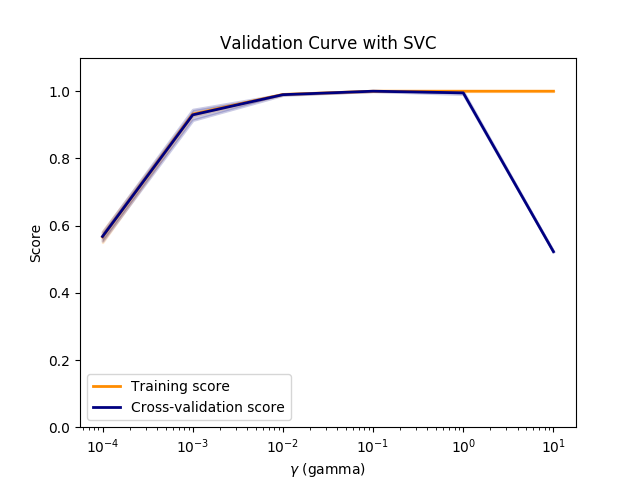

(array([ 0.56647847,  0.93155951,  0.99039881,  1.        ,  1.        ,  1.        ]),
 array([ 0.56768547,  0.92959558,  0.98965952,  1.        ,  0.99507994,
         0.52240279]))

In [9]:
def answer_six():
    from sklearn.svm import SVC
    from sklearn.model_selection import validation_curve
    """
    Notes:

    Use 6 gamma values [0.0001, 0.001, 0.01, 0.1, 1, 10]

    For Radial Basis Function kernels, the gamma parameter defines how far the influence of a single training example 
    reaches, with low values meaning 'far' and high values meaning 'close'.

    The C parameter trades off misclassification of training examples against simplicity of the decision surface. 
    A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly by 
    giving the model freedom to select more samples as support vectors.
    """

    # Your code here
    global X_subset
    global y_subset
    
    param_range = np.logspace(-4, 1, 6)  # Use 6 gamma values [0.0001, 0.001, 0.01, 0.1, 1, 10]
    
    # create SVC model; be careful to use 'rbf' for the kernel and the correct C.
    clf = SVC(kernel='rbf', C=1, random_state=0).fit(X_subset, y_subset)
    
    
    #Then run the validation_curve function which should return the different train_scores and test_scores for 
    # the param_range (parameter range) you have defined.
    train_scores, test_scores = validation_curve(SVC(), X_subset, y_subset,
                                            param_name='gamma',
                                            param_range=param_range, cv=3)  # 3 k-fold
    
    #print(train_scores.shape)
    # (6, 3)
    # print(test_scores.shape)
    # (6, 3)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    # print(train_scores_mean.shape)
    # (6,)
    # print(test_scores_mean.shape)
    # (6,)
    
    %matplotlib notebook
    import matplotlib.pyplot as plt

    plt.title('Validation Curve with SVC')

    plt.xlabel('$\gamma$ (gamma)')

    plt.ylabel('Score')

    plt.ylim(0.0, 1.1)

    lw = 2

    plt.semilogx(param_range, train_scores_mean, label='Training score',

    color='darkorange', lw=lw)

    plt.fill_between(param_range, train_scores_mean - train_scores_std,

    train_scores_mean + train_scores_std, alpha=0.2,

    color='darkorange', lw=lw)

    plt.semilogx(param_range, test_scores_mean, label='Cross-validation score',

    color='navy', lw=lw)

    plt.fill_between(param_range, test_scores_mean - test_scores_std,

    test_scores_mean + test_scores_std, alpha=0.2,

    color='navy', lw=lw)

    plt.legend(loc='best')

    plt.show()
    
    # Your answer here
    return train_scores_mean, test_scores_mean

answer_six()


### Question 7

Based on the scores from question 6, what gamma value corresponds to a model that is underfitting (and has the worst test set accuracy)? What gamma value corresponds to a model that is overfitting (and has the worst test set accuracy)? What choice of gamma would be the best choice for a model with good generalization performance on this dataset (high accuracy on both training and test set)? Note: there may be multiple correct solutions to this question.

(Hint: Try plotting the scores from question 6 to visualize the relationship between gamma and accuracy.)

*This function should return one tuple with the degree values in this order: `(Underfitting, Overfitting, Good_Generalization)`*

In [10]:
def answer_seven():
    
    # Your code here
    Underfitting = 0.0001   # underfitting and has the worst test set accuracy
    Overfitting = 10        # overfitting and has the worst test set accuracy
    Good_Generalization = 0.1   # has high accuracy on both training and test set
    
    
    # Return your answer
    return Underfitting, Overfitting, Good_Generalization

answer_seven()

(0.0001, 10, 0.1)